# Comparing Embedding Models

## Setup

In [1]:
%matplotlib widget
import os
import mplcursors
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from datasets import load_dataset
from langchain_aws.embeddings import BedrockEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings

## Load the "Tiny Shakespeare" dataset

In [4]:
dataset = load_dataset("Trelis/tiny-shakespeare")

texts = dataset["train"]["Text"] + dataset["test"]["Text"]
print(f'Imported {len(texts)} texts')

print('First 100 characters of text #42:')
print(texts[42])

Imported 521 texts
First 100 characters of text #42:
Mildly!

BRUTUS:
In this point charge him home, that he affects
Tyrannical power: if he evade us there,
Enforce him with his envy to the people,
And that the spoil got on the Antiates
Was ne'er distributed.
What, will he come?

AEdile:
He's coming.

BRUTUS:
How accompanied?

AEdile:
With old Menenius, and those senators
That always favour'd him.

SICINIUS:
Have you a catalogue
Of all the voices that we have procured
Set down by the poll?

AEdile:
I have; 'tis ready.
Mildly!

BRUTUS:
In this point charge him home, that he affects
Tyrannical power: if he evade us there,
Enforce him with his envy to the people,
And that the spoil got on the Antiates
Was ne'er distributed.
What, will he come?

AEdile:
He's coming.

BRUTUS:
How accompanied?

AEdile:
With old Menenius, and those senators
That always favour'd him.

SICINIUS:
Have you a catalogue
Of all the voices that we have procured
Set down by the poll?

AEdile:

SICINIUS:
Have you colle

In [6]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Text'],
        num_rows: 472
    })
    test: Dataset({
        features: ['Text'],
        num_rows: 49
    })
})


In [7]:
# These color values derived from the length of each text will be used further down in both visualizations

colors = np.array([len(text) for text in texts])
print(f"First 4 color values: {colors[:4]}")

First 4 color values: [3131 1703 1614 3199]


## Configure the embedding model

In [8]:
# from sentence_transformers import SentenceTransformer

# model_name = "sentence-transformers/all-MiniLM-L6-v2"
# minilm_model = SentenceTransformer(model_name)

In [9]:
embedding_model = BedrockEmbeddings(model_id='amazon.titan-embed-text-v2:0')

## Generate the embeddings

In [10]:
# embeddings = minilm_model.encode(texts, show_progress_bar=True)
embeddings = embedding_model.embed_documents(texts)

In [11]:
print(len(embeddings))

521


### Reduce the embeddings using Principal Component Analysis (PCA)

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca_two_d = PCA(n_components=2)
pca_two_d.fit(embeddings)
pca_two_d_embeddings = pca_two_d.transform(embeddings)

In [15]:
print(pca_two_d_embeddings.shape)

(521, 2)


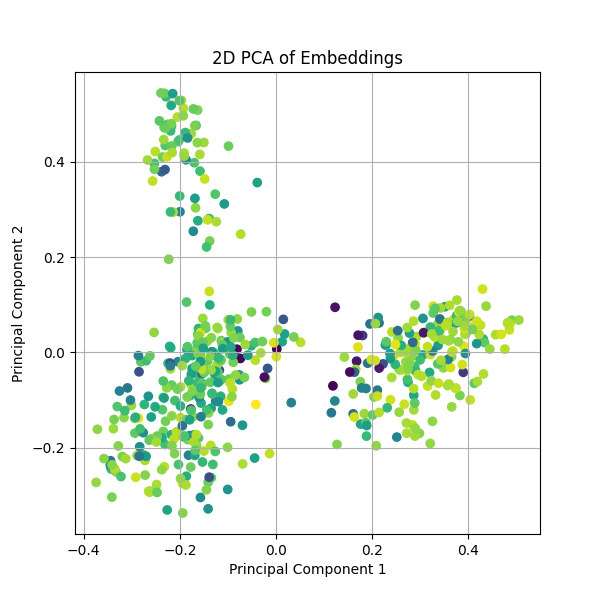

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_two_d_embeddings[:, 0], pca_two_d_embeddings[:, 1], c=colors, marker='o')
plt.title('2D PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Reduce the embeddings using t-distributed Stochastic Neighbor Embedding (t-SNE)

In [18]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2)
tsne_reduced_embeddings = tsne.fit_transform(np.array(embeddings))

In [21]:
print(tsne_reduced_embeddings.shape)

(521, 2)


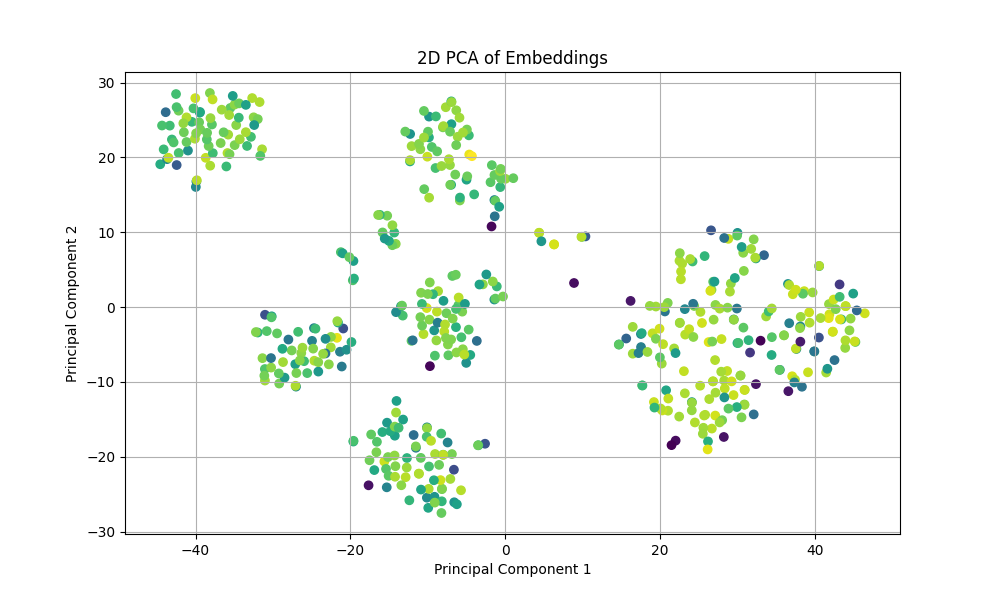

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_reduced_embeddings[:, 0], tsne_reduced_embeddings[:, 1], c=colors, marker='o')
plt.title('2D PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Exercises

- Experiment with modifying the plots. A few ideas: change colors, plot a different number of points
- Try swapping out the embedding model with an AWS Bedrock embedding model from the first notebook 

## Discussion Questions

- Do you notice any differences between the two plots?
- We chose text length to determine the color value, what else could we use to differentiate points?